<a href="https://colab.research.google.com/github/RogueNPC/neural-network-classifier/blob/main/Int_1_2_OCTMNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP LEARNING FOR IMAGE CLASSIFICATION
### The Make School Winter 2021 Data Science Intensive <br>

Instructor: Joseph Catanzarite <br>
Dates: 07 - 12 Jan 2021 


<img src="https://medmnist.github.io/assets/overview.jpg">

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/drive/19y0pHqFsaN9-ehvCcuiXFL7FryIBXRTf?usp=sharing" 
    ><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>

</table>



## Goals
* Introduce Juniors to Make School’s Data Science concentration
* Allow Seniors an opportunity to exercise and further develop their Data Science skills





## Learning Objectives: <br>
On completion, the student will have gained familiarity with 
* The basic pattern of the data science workflow
* The TensorFlow/Keras deep learning library
* Google Colab and the magic of cloud computing

AND

* Enough knowledge to create a simple Neural Network Classifier project




## [Project Overview](https://docs.google.com/document/d/1Tr2lJAb-pyDrMcIw-nN-AixGDA0GeqeA1c2LxZVBPRw/edit?usp=sharing)

# Part 1. 
## How to build a neural network to classify clothing items in the Fashion MNIST dataset
This is a modified version of the original [TensorFlow tutorial](https://www.tensorflow.org/tutorials/keras/classification).

This guide shows you how to train a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

This guide uses [tf.keras](https://www.tensorflow.org/guide/keras), a high-level API to build and train models in TensorFlow.

## 1. Import the Fashion MNIST dataset

We'll work with the [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) dataset which contains 70,000 grayscale images in 10 categories. The images show individual articles of clothing at low resolution (28 by 28 pixels), as seen here:

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Fashion MNIST is intended as a drop-in replacement for the classic [MNIST](http://yann.lecun.com/exdb/mnist/) dataset—often used as the "Hello, World" of machine learning programs for computer vision. The MNIST dataset contains images of handwritten digits (0, 1, 2, etc.) in a format identical to that of the articles of clothing you'll use here.

This guide uses Fashion MNIST for variety, and because it's a slightly more challenging problem than regular MNIST. Both datasets are relatively small and are used to verify that an algorithm works as expected. They're good starting points to test and debug code.

Here, 60,000 images are used to *train* the network and 10,000 images to *evaluate* how accurately the network learned to classify images. You can access the Fashion MNIST directly from TensorFlow. Import and load the Fashion MNIST data directly from TensorFlow:

In [3]:
# TensorFlow and tf.keras
import tensorflow as tf

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.4.0


In [4]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [5]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0:10])

(60000, 28, 28)
(60000,)
[9 0 0 3 0 2 7 2 5 5]


Loading the dataset returns four NumPy arrays:

* The `train_images` and `train_labels` arrays are the *training set*—the data the model uses to learn.
* The model is tested against the *test set*, the `test_images`, and `test_labels` arrays.

The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The *labels* are an array of integers, ranging from 0 to 9. These correspond to the *class* of clothing the image represents:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Each image is mapped to a single label. Since the *class names* are not included with the dataset, store them here to use later when plotting the images:

In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

Let's explore the format of the dataset before training the model. The following shows there are 60,000 images in the training set, with each image represented as 28 x 28 pixels:

In [7]:
train_images.shape

(60000, 28, 28)

Likewise, there are 60,000 labels in the training set:

In [8]:
len(train_labels)

60000

Each label is an integer between 0 and 9:

In [9]:
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

There are 10,000 images in the test set. Again, each image is represented as 28 x 28 pixels:

In [10]:
test_images.shape

(10000, 28, 28)

And the test set contains 10,000 images labels:

In [11]:
len(test_labels)

10000

## 3. Preprocess the data

The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

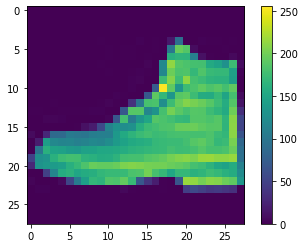

In [12]:
plt.figure()
plt.imshow(train_images[50000])
plt.colorbar()
plt.grid(False)
plt.show()

Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the *training set* and the *testing set* be preprocessed in the same way:

In [13]:
train_images = train_images / 255.0

test_images = test_images / 255.0

To verify that the data is in the correct format and that you're ready to build and train the network, let's display the first 25 images from the *training set* and display the class name below each image.

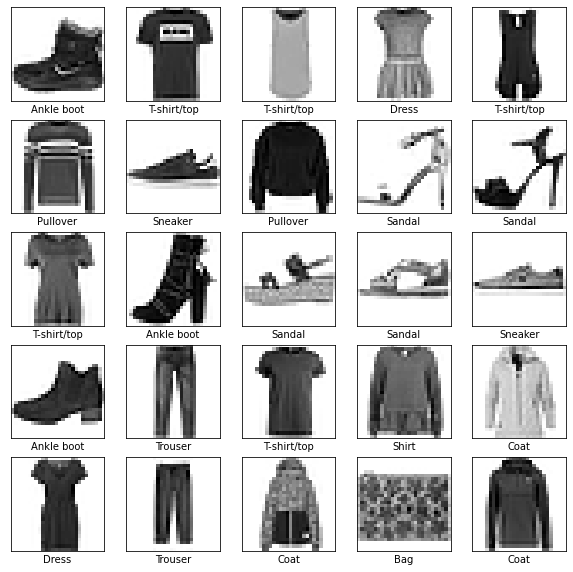

In [14]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. Build the neural network model

Building the neural network requires configuring the layers of the model, then compiling the model.

### Set up the layers

The basic building block of a neural network is the *layer*. Layers extract representations from the data fed into them. Hopefully, these representations are meaningful for the problem at hand.

Most of deep learning consists of chaining together simple layers. Most layers, such as `tf.keras.layers.Dense`, have parameters that are learned during training.

In [81]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons). The second (and last) layer returns a logits array with length of 10. Each node contains a score that indicates the current image belongs to one of the 10 classes.

### Compile the model

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees in order to find the minimum of the loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

In [82]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the model

Training the neural network model requires the following steps:

1. Feed the training data to the model. In this example, the *training* data is in the `train_images` and `train_labels` arrays.
2. The model learns from the training data to associate images and labels.
3. You ask the model to make predictions about a *test* set—in this example, the `test_images` array. Given an image (say of an `ankle boot`, or a `dress`), the model does its best to predict the right label.
4. Check how well the predictions match the labels from the `test_labels` array.


### Fit the model to the data

To start training,  call the `model.fit` method—so called because it "fits" the model to the training data:

In [37]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5979 - accuracy: 0.7924
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3757 - accuracy: 0.8623
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3377 - accuracy: 0.8759
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2975 - accuracy: 0.8908
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2857 - accuracy: 0.8934
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2740 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2611 - accuracy: 0.9018
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2475 - accuracy: 0.9065
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2348 - accuracy: 0.9141
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.225

As the model trains, the *loss* and *accuracy* metrics are displayed. <br>
Remember that during training, the model figures out how to minimize the *loss* function -- which maximizes its ability to predict labels for each image. <br> 
On the other hand, *accuracy* is a more intuitive measure of how well the model can predict image labels.<br>
This model reaches an accuracy of about 0.91 (or 91%) on the training data.

### Evaluate the accuracy

Next, compare how the model performs on the *test* dataset:

In [38]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3496 - accuracy: 0.8794

Test accuracy: 0.8794000148773193


It turns out that the accuracy on the test dataset is a little less than the accuracy on the training dataset. This gap between training accuracy and test accuracy represents *overfitting*. Overfitting happens when a machine learning model performs worse on new, previously unseen inputs than it does on the training data. An overfitted model "memorizes" the noise and details in the training dataset to a point where it negatively impacts the performance of the model on the new data. For more information, see the following:
*   [Demonstrate overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#demonstrate_overfitting)
*   [Strategies to prevent overfitting](https://www.tensorflow.org/tutorials/keras/overfit_and_underfit#strategies_to_prevent_overfitting)

### Make predictions

The label prediction comes from the model's 10 linear outputs, which are called [logits](https://developers.google.com/machine-learning/glossary#logits). <br>

Remember that there is one output for each of the ten image classes, and that the mapping of output positions to labels is<br>
'0': 'T-shirt/top'<br>
'1': 'Trouser'<br>
'2': 'Pullover'<br>
'3': 'Dress'<br>
'4': 'Coat'<br>
'5': 'Sandal'<br>
'6': 'Shirt'<br>
'7': 'Sneaker'<br>
'8': 'Bag'<br>
'9': 'Ankle boot'<br>

As we might expect, the output with the highest *logit* value corresponds to the class label prediction of the model. <br>

So if, for a given image, the 3rd logit output is highest, the label prediction is 'Pullover'

We can make our model more interpretable by converting the *logit* outputs to *probabilities*, which tell us how confident our model is in assigning a label for each class. <br>

To accomplish this conversion of logits to class probabilites we add on a `softmax layer`.

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

Here, the model has predicted the label for each image in the testing set. Let's take a look at the first prediction:

In [ ]:
predictions[0]

array([5.0232341e-28, 4.5562902e-14, 0.0000000e+00, 2.1758952e-13,
       0.0000000e+00, 2.0543188e-03, 0.0000000e+00, 2.8440684e-02,
       4.7418964e-14, 9.6950501e-01], dtype=float32)

A prediction is an array of 10 numbers. They represent the model's "confidence" that the image corresponds to each of the 10 different articles of clothing. You can see which label has the highest confidence value:

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or `class_names[9]`. Examining the test label shows that this classification is correct:

In [ ]:
test_labels[0]

9

Graph this to look at the full set of 10 class predictions.

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Verify predictions on unseen test images

With the trained model, you can predict labels for any images from the test set.<br>

Let's look at the 0th image, predictions, and prediction array. Correct prediction labels are blue and incorrect prediction labels are red. The number gives the percentage (out of 100) for the predicted label.

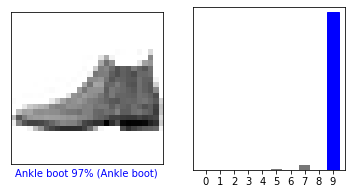

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

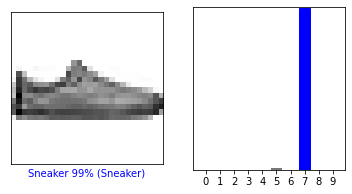

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Let's plot several images with their predictions. Note that the model can be wrong even when very confident.

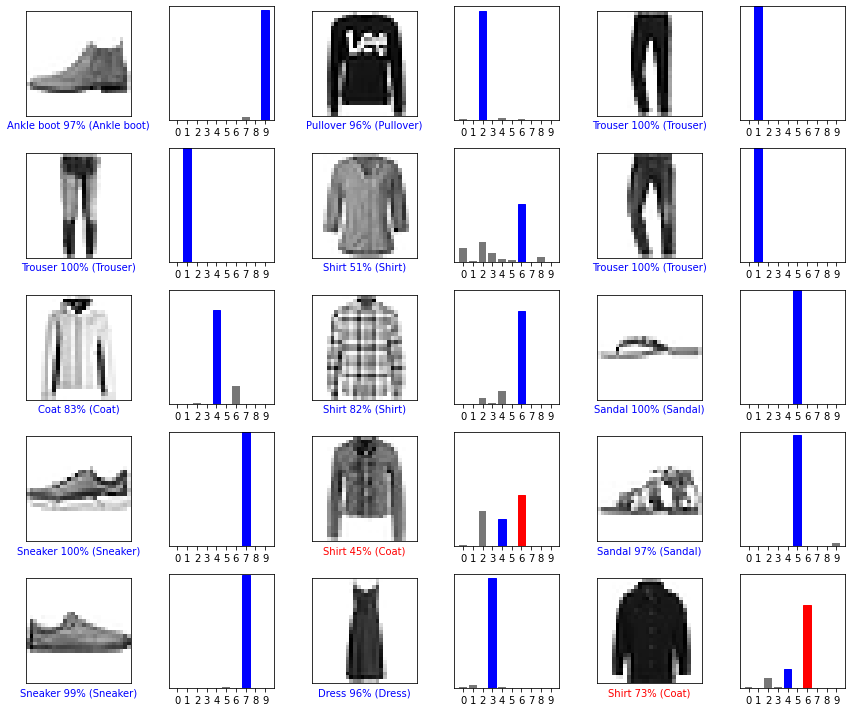

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

Finally, use the trained model to make a prediction about a single test image.

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


`tf.keras` models are optimized to make predictions on a *batch*, or collection, of examples at once. Accordingly, even though you're using a single image, you need to add it to a list:

In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


Now predict the correct label for this image:

In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[9.0573989e-03 2.0174193e-04 9.5581400e-01 3.6857519e-04 2.3088241e-02
  2.9713950e-16 1.1231382e-02 0.0000000e+00 2.3869645e-04 1.0527523e-22]]


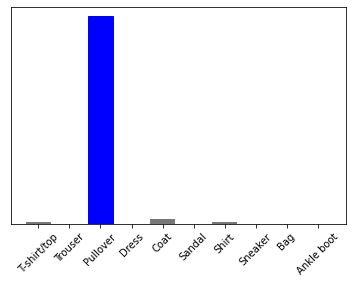

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`tf.keras.Model.predict` returns a list of lists—one list for each image in the batch of data. Grab the predictions for our (only) image in the batch:

In [ ]:
np.argmax(predictions_single[0])

2

And the model predicts a label as expected.

###You have now learned the pattern of the basic "Data Science Workflow"!<br>
This is the standard approach to any data science problem<br>
* Get and load data
* Split data into training, validation, and test data sets
* No DATA SNOOPING! *Never* look at or examine the test data until after the last step (below), when you evaluate the performance of your FINAL model!
* Explore and familiarize with the training data
* Create or select a model
* Train the model to perform well on the training data
* Use the trained model to predict on the validation data
* Improve or tune the model, using the validation data. Finalize the model.
* Evaluate the performance of the FINAL model on the test data


# Part 2. Experiments with Fashion MNIST (100 points)<br>

Choose any **two** of the following experiments which are the most interesting to you, and see how the accuracy of the FashionMNIST classifier is affected in each case. <br>
If it makes sense to do so, predict what you *think* will happen *before* doing the experiment. <br>
Explain what you think happened *after* doing the experiment. <br>
Modify this notebook with commented documenting your experiments.<br>

**Experiment #1** *Change the learning rate*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the `learning_rate`. Try values of `learning_rate` in [0.1, 0.01, 0.001, 0.0001, 0.00001] and make a plot of how the validation accuracy depends on the learning rate, all other things being the same.<br>

**Experiment #2** *Identify the hard-to-classify items*<br>
Find out the accuracy of your model as a function of clothing item. Which clothing item was the hardest to classify, i.e. most often misclassified? Were misclassified examples always confused with the same wrong clothing item, or were they confused with more than one other clothing item?  Examine a few misclassified examples of this hardest-to-classify clothing item. See if you can come up with an explanation of why the model has trouble classifying this clothing item?<br>

**Experiment #3** *Add a hidden layer*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the number of hidden layers in your model. Add another hidden layer to the model. How does the validation accuracy change?<br>

**Experiment #4** *Change the number of neurons*<br>
Look up the `model.fit` method in the keras docs, and figure out how to change the number of neurons in the hidden layer of your model. Change the number of neurons in your hidden layer to N, where N is in 32, 64, 256, 512. Determine how the validation accuracy depends on N and display your results in a plot or table.<br>

**Experiment #5** *Change the number of training epochs*<br>
Change the number N of training epochs systematically with N in [2, 4, 6, 8, 10, 12, 14, 16, 18, 20 ]and keep track of the resulting validation accuracy. At which N does the validation accuracy reach a maximum. Display your results in a plot or table.<br>

**Experiment #6** *Reduce the amount of training data*<br>
Reduce the number of training data images by N percent, where N is in [5, 10, 20, 40, 50]. How does the validation accuracy depend on N? Display your results in a plot or table.<br>

**Experiment #7** *Data Augmentation*<br>
Add horizontally "flipped versions" of the training images to the training set. How does the validation accuracy of your model change?<br>

**Experiment #8** *Downsample the images*<br>
Downsample all the images by a factor of 2, and see how the validation accuracy of your model changes.<br>

**Experiment #9** *Add noise to the images*<br>
Replace a number N of randomly chosen pixels in each training image by random numbers between 0 and 255, for N = 10, 20, 20, 30, 40, 50. How does the validation accuracy depend on N? Display your results in a plot or table.<br>



### Explain and document the results of your experiments

In [ ]:
# Experiment 4 Change the number of neurons

**Prediction** -- The validation accuracy will increase as the number of neurons in the model increases.

In [15]:
# N=32
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Validation Accuracy = 0.8698

In [19]:
# N=64
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Validation Accuracy = 0.8747

In [ ]:
# N=128 (Original Value)
# Validation Accuracy = 0.8890

In [35]:
# N=256
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Validation Accuracy = 0.8848

In [31]:
# N=512
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])
# Validation Accuracy = 0.8852

In [ ]:
# Evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

**Conclusion** -- The validation accuracy increased as the number of neurons increased, but capped at 88.90% and actually decreased as the number of neurons increased from 128.

---



In [ ]:
# Experiment 5 Change the number of training epochs

**Prediction** -- The validation accuracy will increase as the number of training epochs in the model increases.

In [51]:
# N=2
model.fit(train_images, train_labels, epochs=2)
# Validation Accuracy = 0.8666

Epoch 1/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6167 - accuracy: 0.7833
Epoch 2/2
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3896 - accuracy: 0.8595


In [47]:
# N=4
model.fit(train_images, train_labels, epochs=4)
# Validation Accuracy = 0.8730

Epoch 1/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6272 - accuracy: 0.7831
Epoch 2/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3742 - accuracy: 0.8661
Epoch 3/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3411 - accuracy: 0.8751
Epoch 4/4
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3129 - accuracy: 0.8842


In [55]:
# N=6
model.fit(train_images, train_labels, epochs=6)
# Validation Accuracy = 0.8783

Epoch 1/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6312 - accuracy: 0.7783
Epoch 2/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3881 - accuracy: 0.8598
Epoch 3/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3417 - accuracy: 0.8769
Epoch 4/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3171 - accuracy: 0.8839
Epoch 5/6
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3006 - accuracy: 0.8913
Epoch 6/6
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2778 - accuracy: 0.8963


In [59]:
# N=8
model.fit(train_images, train_labels, epochs=8)
# Validation Accuracy = 0.8791

Epoch 1/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6250 - accuracy: 0.7822
Epoch 2/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3867 - accuracy: 0.8619
Epoch 3/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3374 - accuracy: 0.8769
Epoch 4/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3121 - accuracy: 0.8845
Epoch 5/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2930 - accuracy: 0.8905
Epoch 6/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2751 - accuracy: 0.8980
Epoch 7/8
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2697 - accuracy: 0.9004
Epoch 8/8
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2551 - accuracy: 0.9072


In [63]:
# N=10
model.fit(train_images, train_labels, epochs=10)
# Validation Accuracy = 0.8848

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6371 - accuracy: 0.7784
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3806 - accuracy: 0.8609
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3414 - accuracy: 0.8764
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3134 - accuracy: 0.8847
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2891 - accuracy: 0.8936
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2780 - accuracy: 0.8972
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2677 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2559 - accuracy: 0.9051
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2458 - accuracy: 0.9077
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.237

In [67]:
# N=12
model.fit(train_images, train_labels, epochs=12)
# Validation Accuracy = 0.8789

Epoch 1/12
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6395 - accuracy: 0.7756
Epoch 2/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3851 - accuracy: 0.8615
Epoch 3/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3391 - accuracy: 0.8765
Epoch 4/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3169 - accuracy: 0.8835
Epoch 5/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2966 - accuracy: 0.8905
Epoch 6/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2802 - accuracy: 0.8963
Epoch 7/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2703 - accuracy: 0.8986
Epoch 8/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2559 - accuracy: 0.9026
Epoch 9/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2495 - accuracy: 0.9050
Epoch 10/12
1875/1875 [==============================] - 3s 2ms/step - loss: 0.241

In [71]:
# N=14
model.fit(train_images, train_labels, epochs=14)
# Validation Accuracy = 0.8850

Epoch 1/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6256 - accuracy: 0.7828
Epoch 2/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3826 - accuracy: 0.8623
Epoch 3/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3365 - accuracy: 0.8768
Epoch 4/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3108 - accuracy: 0.8874
Epoch 5/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2905 - accuracy: 0.8932
Epoch 6/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2759 - accuracy: 0.8962
Epoch 7/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2609 - accuracy: 0.9047
Epoch 8/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2546 - accuracy: 0.9045
Epoch 9/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2446 - accuracy: 0.9081
Epoch 10/14
1875/1875 [==============================] - 4s 2ms/step - loss: 0.237

In [75]:
# N=16
model.fit(train_images, train_labels, epochs=16)
# Validation Accuracy = 0.8868

Epoch 1/16
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6408 - accuracy: 0.7764
Epoch 2/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3845 - accuracy: 0.8619
Epoch 3/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3443 - accuracy: 0.8731
Epoch 4/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3129 - accuracy: 0.8843
Epoch 5/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2969 - accuracy: 0.8905
Epoch 6/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2833 - accuracy: 0.8972
Epoch 7/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2717 - accuracy: 0.8993
Epoch 8/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2571 - accuracy: 0.9038
Epoch 9/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2433 - accuracy: 0.9102
Epoch 10/16
1875/1875 [==============================] - 3s 2ms/step - loss: 0.239

In [79]:
# N=18
model.fit(train_images, train_labels, epochs=18)
# Validation Accuracy = 0.8899

Epoch 1/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6235 - accuracy: 0.7839
Epoch 2/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3866 - accuracy: 0.8602
Epoch 3/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3402 - accuracy: 0.8770
Epoch 4/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3166 - accuracy: 0.8852
Epoch 5/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2974 - accuracy: 0.8890
Epoch 6/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2756 - accuracy: 0.8980
Epoch 7/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2700 - accuracy: 0.8989
Epoch 8/18
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2536 - accuracy: 0.9057
Epoch 9/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2438 - accuracy: 0.9091
Epoch 10/18
1875/1875 [==============================] - 3s 2ms/step - loss: 0.235

In [83]:
# N=20
model.fit(train_images, train_labels, epochs=20)
# Validation Accuracy = 0.8858

Epoch 1/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6330 - accuracy: 0.7816
Epoch 2/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3802 - accuracy: 0.8628
Epoch 3/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8798
Epoch 4/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3143 - accuracy: 0.8848
Epoch 5/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2955 - accuracy: 0.8909
Epoch 6/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2798 - accuracy: 0.8958
Epoch 7/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2704 - accuracy: 0.8997
Epoch 8/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2560 - accuracy: 0.9037
Epoch 9/20
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2517 - accuracy: 0.9049
Epoch 10/20
1875/1875 [==============================] - 3s 2ms/step - loss: 0.232

In [84]:
# Evaluate the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.3659 - accuracy: 0.8858

Test accuracy: 0.8858000040054321


**Conclusion** -- The validation accuracy increased as the number of training epochs increased, but started slowing down as epochs grew over 10 and even sometimes lead to a lower accuracy (from 10 to 12 epochs and 18 to 20 epochs).

# Part 3. Mini-project: MedMNIST classifier (100 points) <br>

## 3A. Set up your project folder on Google Drive and get the MedMNIST data
* If you don't already have, [Google Drive](https://www.google.com/intl/en_in/drive/), get it. <br>

* Save a copy of this notebook in Google Drive: from the `File` menu of this notebook, choose `Save a Copy In Drive` 
* Now you can rename your copy of the notebook to whatever name you choose
* From the `File` menu, choose `Locate in Drive` to see the saved copy of the notebook in your Google Drive
* Make a new folder in Google Drive called `Colab Notebooks`
* In the `Colab Notebooks` folder, make a subfolder called `Make School Winter 2021 Intensive`
* Move your saved copy of the notebook file into the `Make School Winter 2021 Intensive` folder
* Download the [MedMNIST data sets](https://zenodo.org/record/4269852) to your computer.
* Put the data files into the `Make School Winter 2021 Intensive` folder in your Google Drive. To do this:<br>
1. From the `File` menu, choose `Locate in Drive` <br>
2. Click the colored `+ New` icon at the top left and choose `File upload`<br>
3. Navigate to the folder in your computer where you downloaded the data files, and select all 10 of the `.npz files` for upload. The upload process may take a few minutes.












## 3B. Code to read and extract the MedMNIST data sets
The ten data sets can be downloaded one by one by following the `zenodo` link in the [MedMNIST Classification Decathlon home page](https://medmnist.github.io/)<br>
 <br>
The project is described in this short [paper](https://arxiv.org/abs/2010.14925) <br>


Download the data files and copy them into the `Make School Winter 2021 Intensive` folder<br>
The data files have the`.npz` extension. <br>
They are in a "compressed numpy format", and they can be read using the `load_npz` command.<br>
Below is code you can use to read any of the MedMNIST data sets into the format required to train your model.

### Mount your local file system on Google Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Navigate to your project folder on Google Drive

In [ ]:
%cd /content/drive/MyDrive/Intensives/Colab Notebooks/Make School Winter 2021 Intensive
%ls 

/content/drive/MyDrive/Intensives/Colab Notebooks/Make School Winter 2021 Intensive
 breastmnist.npz
 chestmnist.npz
 dermamnist.npz
'Int 1.2 OCTMNIST PneumoniaMNIST_classification.ipynb'
'Int 1.2 OCTMNIST PneumoniaMNIST_classification(old).ipynb'
 octmnist.npz
 organmnist_axial.npz
 organmnist_coronal.npz
 organmnist_sagittal.npz
 pathmnist.npz
 pneumoniamnist.npz
 retinamnist.npz


In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import os

print(tf.__version__)

2.4.0


### Read the MedMNIST data sets into a `python dictionary` 
The `keys` are the names of the MedMNIST data sets <br> 
The `values` contain the data sets

In [ ]:
# make a list of the .npz files
files = [x for x in os.listdir() if x[-4::]=='.npz']
print('List of the MedMNIST data set files:\n',files)

# make a list of the MedMNIST data sets
data_sets = [x[:-4] for x in os.listdir() if x[-3::]=='npz']
print('\n\n','The names of the MedMNIST data sets are:\n',data_sets)

# extract the MedMNIST data sets into a dictionary named MedMNIST
MedMNIST = {file[:-4]:np.load(file) for file in files}

List of the MedMNIST data set files:
 ['octmnist.npz', 'breastmnist.npz', 'retinamnist.npz', 'dermamnist.npz', 'chestmnist.npz', 'organmnist_axial.npz', 'organmnist_coronal.npz', 'pneumoniamnist.npz', 'organmnist_sagittal.npz', 'pathmnist.npz']


 The names of the MedMNIST data sets are:
 ['octmnist', 'breastmnist', 'retinamnist', 'dermamnist', 'chestmnist', 'organmnist_axial', 'organmnist_coronal', 'pneumoniamnist', 'organmnist_sagittal', 'pathmnist']


### The dictionary's `keys` are the names of the MedMNIST data sets

In [ ]:
print(list(MedMNIST.keys()))

['octmnist', 'breastmnist', 'retinamnist', 'dermamnist', 'chestmnist', 'organmnist_axial', 'organmnist_coronal', 'pneumoniamnist', 'organmnist_sagittal', 'pathmnist']


### How can we extract the MedMNIST data sets from our dictionary?
The entries in our dictionary are objects of type `<class 'numpy.lib.npyio.NpzFile'>`<br>
It turns out that each of these objects itself contains a dictionary. <br>
The object has a `files` attribute with the `keys` to this dictionary within a dictionary<br>
These `keys` are the names of the data sets we want!<br>
Let's see how this works, by examining the object corresponding to the `octmnist` data set

In [ ]:
print('The MedMNIST dictionary entries are objects of type\n',type(MedMNIST['octmnist']))
print('\nEach such object contains a dictionary whose keys are\n',MedMNIST['octmnist'].files)

The MedMNIST dictionary entries are objects of type
 <class 'numpy.lib.npyio.NpzFile'>

Each such object contains a dictionary whose keys are
 ['train_images', 'val_images', 'test_images', 'train_labels', 'val_labels', 'test_labels']


### Using the `keys`, let's extract the `octmnist` data set as an example
Note that `TensorFlow/Keras` requires the labels to be a vector, not a 1-dimensional array;
that's the reason we use the `.squeeze()`commands in the code cell below.

In [ ]:
train_labels = MedMNIST['octmnist']['train_labels'].squeeze()
train_images = MedMNIST['octmnist']['train_images']

val_labels = MedMNIST['octmnist']['val_labels'].squeeze()
val_images = MedMNIST['octmnist']['val_images']

test_labels = MedMNIST['octmnist']['test_labels'].squeeze()
test_images = MedMNIST['octmnist']['test_images']

### Let's check that the data is in the correct format for TensorFlow/Keras
Yep. Looks good. We see below that there are <br>
* 546 examples in the `train` data set
* 78 examples in the `valid` data set
* 156 examples in the `test` data set <br>

This is a rather small data set, so you probably want to choose one of the larger data sets for your project in order to get higher accuracy from your model.



In [ ]:
print(train_images.shape)
print(train_labels.shape)
print(train_labels[0:10])

(97477, 28, 28)
(97477,)
[0 3 3 3 0 3 1 0 3 3]


In [ ]:
print(val_images.shape)
print(val_labels.shape)

(10832, 28, 28)
(10832,)


In [ ]:
print(test_images.shape)
print(test_labels.shape)

(1000, 28, 28)
(1000,)


In [ ]:
#imporvised classnames (not provided class names)
class_names = [0,1,2,3]

### How to handle the MedMNIST data sets that have RGB images instead of grayscale images?



For some of the MedMNIST data sets, each example is a set of three RGB (i.e., Red, Green, Blue) images rather than a single grayscale image. 

So if there were say 10,000 images in the training set, `train_images.shape` would be (10000, 28, 28, 3)

Of course, the tensorflow classifier that we used with FashionMNIST will throw an error if you give it `train_images` as the input, because it expects a single grayscale image, not a set of three RGB images!

So what can you do? 

A quick solution is to extract only the R (or  G, or B) from each example.

Save the original data object, because we'll want it for later:<br>
`train_images_original = train_images`

Then extract only the first image for each example:<br>
`train_images = train_images[:,:,:,0]`

Now check: `train_images.shape` should be
(10000,28,28) With this as the input your classifier should train! 

Is that the best solution? Probably not, because you are throwing away valuable data in the other two images!

You might be able to improve your model accuracy by including information from the other two images.

One way is to simply *average* the three RGB images together for each example, and use the averaged image instead of the first image.

Here's how to average all the RGB images into a single image:<br>
`train_images = train_images_original.mean(axis=-1)`
and check, as before that `train_images.shape` is (10000,28,28)

Another way is to *concatenate* the three RGB images. <br>
Concatenation means arranging the three 28 x 28 images arrays side by side. <br>
This is equivalent to a single 28 x 3*28 array, i.e. a 28 x 84 array.  

To do this, let's first extract the R, G, and B images separately:

`R_images = train_images_original[:,:,:,0]`<br>
`G_images = train_images_original[:,:,:,1]`<br>
`B_images = train_images_original[:,:,:,2]`<br>

Then we can concatenate them into a
(10000, 28, 84) array:

`train_images = np.concatenate((R_images,G_images, B_images), axis = -1)`, and check that `train_images.shape` is indeed (10000, 28, 84).

The tensorflow/keras model should now work fine when you feed it `train_images` as the input. The only difference is that the flattened images will be of dimension 3*784 = 2352 instead of 784, so training will take longer.

It would be interesting to see which of the three methods outlined above gives you the best accuracy for your model!





## 3C. Build and test a classifier for one of the MedMNIST data sets.

You will note that each of the MedMNIST data sets is split into three parts. <br>
There are `training`, `validation`, and `test` sets. <br>
So why is there a `validation` set? Its purpose is to be used for the experiments you might try to improve the model, such as adding layers and/or nodes, or changing the learning rate and other hyperparameters, etc. <br>

The **No Data Snooping Rule**:<br>
When you are finished fine-tuning and finalizing your model using the `validation` set, only then should you evaluate its performance on the `test` set to see how well it generalizes to new, unseen, untouched data. Once you have evaluated your model on the test set, you are not allowed to make any more changes in the model!<br>

* Choose one of the MedMNIST data sets. <br>
Using part 3B of this notebook as a blueprint, extract your chosen MedMNIST data set and prepare it for building a classifier.<br>

* Using Part 1 of this notebook as a blueprint, build, evaluate and test a classifier for that data set.<br>

* Document your code and your results below. <br>



## 1. Importing OCTMNIST database [ABOVE]

## 2. Explore the data

Labels

In [ ]:
np.unique(train_labels)
# Each label is an integer between 0 and 3 for the OCTMNIST data set

array([0, 1, 2, 3], dtype=uint8)

## 3. Preprocess the data

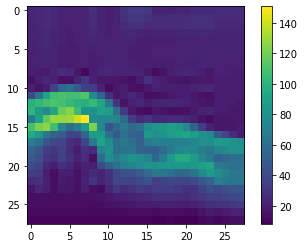

In [ ]:
# Inspect first image in the training set
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scaling values to range of 0 to 1 before feeding to neural network model (assumed 150 based on image)
train_images = train_images / 150.0

val_images = val_images / 150.0

test_images = test_images / 150.0

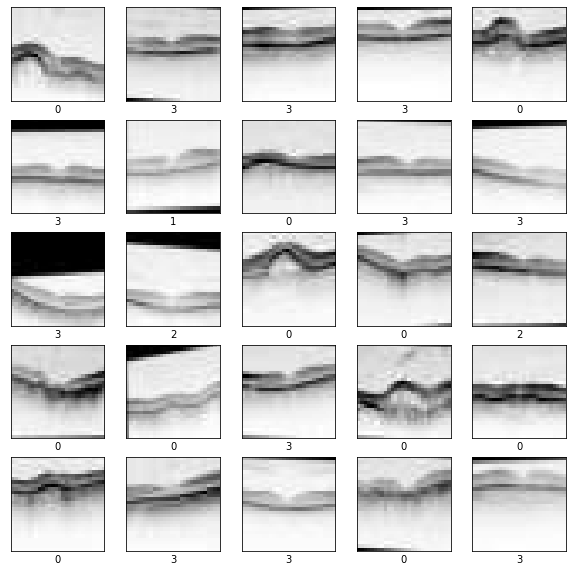

In [ ]:
# Displays the first 25 images from the training set and isplays the class name below each image
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 4. Build the neural network model

In [ ]:
# Setting up the layers
# "The basic building block of a neural network is the layer. Layers extract representations from the data fed into them."
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(4)
])

The first layer in this network, `tf.keras.layers.Flatten`, transforms the format of the images from a two-dimensional array (of 28 by 28 pixels) to a one-dimensional array (of 28 * 28 = 784 pixels). Think of this layer as unstacking rows of pixels in the image and lining them up. This layer has no parameters to learn; it only reformats the data.

After the pixels are flattened, the network consists of a sequence of two `tf.keras.layers.Dense` layers. These are densely connected, or fully connected, neural layers. The first `Dense` layer has 128 nodes (or neurons) **[*default number which can be modified for different results]***. The second (and last) layer returns a logits array with length of 4. Each node contains a score that indicates the current image belongs to one of the 4 classes.

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Before the model is ready for training, it needs a few more settings. These are added during the model's *compile* step:

* *Loss function* —This measures how accurate the model is during training. You want to minimize this function to "steer" the model in the right direction.
* *Optimizer* —This is how the model is updated based on the data it sees in order to find the minimum of the loss function.
* *Metrics* —Used to monitor the training and testing steps. The following example uses *accuracy*, the fraction of the images that are correctly classified.

## 5. Train the model

In [ ]:
# To start training, call the model.fit method—so called because it "fits" the model to the training data:
model.fit(train_images, train_labels, epochs=10)
# number of epochs can be edited for different results

Epoch 1/10
3047/3047 [==============================] - 6s 2ms/step - loss: 1.1509 - accuracy: 0.4950
Epoch 2/10
3047/3047 [==============================] - 6s 2ms/step - loss: 1.0604 - accuracy: 0.5735
Epoch 3/10
3047/3047 [==============================] - 6s 2ms/step - loss: 1.0000 - accuracy: 0.6183
Epoch 4/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.9576 - accuracy: 0.6383
Epoch 5/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.9389 - accuracy: 0.6448
Epoch 6/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.9216 - accuracy: 0.6552
Epoch 7/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.9019 - accuracy: 0.6613
Epoch 8/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.8956 - accuracy: 0.6665
Epoch 9/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.8804 - accuracy: 0.6728
Epoch 10/10
3047/3047 [==============================] - 6s 2ms/step - loss: 0.869

In [ ]:
# Evaluates the accuracy
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

32/32 - 0s - loss: 1.3306 - accuracy: 0.4370

Test accuracy: 0.43700000643730164


**The accuracy of this neural network model is currently very low (correct only 43.7% of the time)**

In [ ]:
# Making predictions
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_images)

In [ ]:
# Model predicted the label for each image in the testing set. This is the first prediction:
predictions[0]

array([0.3852652 , 0.19129094, 0.07844191, 0.345002  ], dtype=float32)

In [ ]:
# A prediction is an array of 4 numbers. They represent the model's "confidence" that the image corresponds 
# to each of the 4 different types of medical diagnoses. You can see which label has the highest confidence value:
np.argmax(predictions[0])

0

In [ ]:
# The model believes the image to be of type 0, but the solution says it should have been of type 3.
test_labels[0]

3

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(4))
  plt.yticks([])
  thisplot = plt.bar(range(4), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

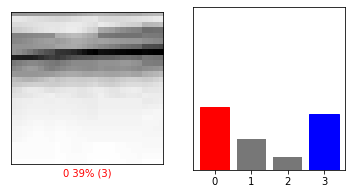

In [ ]:
# Verifying predictions on unseen test images
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

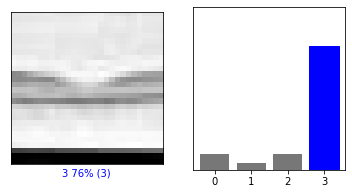

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

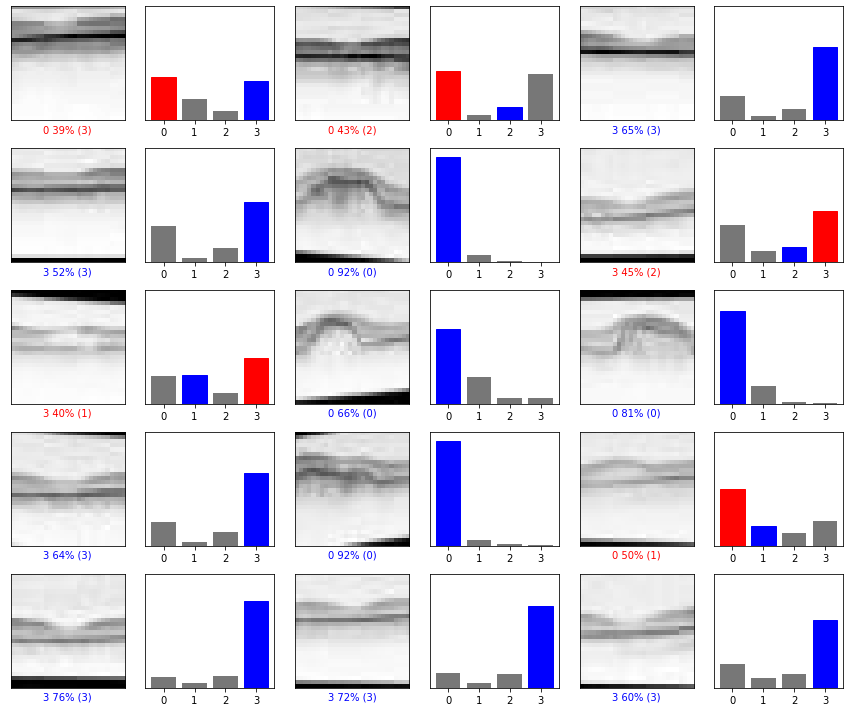

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[2]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
# Predicts the correct label for the image
predictions_single = probability_model.predict(img)

print(predictions_single)

[[0.21315089 0.04223544 0.09846476 0.6461489 ]]


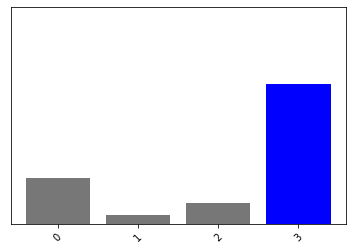

In [ ]:
plot_value_array(2, predictions_single[0], test_labels)
_ = plt.xticks(range(4), class_names, rotation=45)

In [ ]:
# Grab the predictions for our (only) image in the batch:
np.argmax(predictions_single[0])

3

##### Copyright 2018 The TensorFlow Authors.

Original notebook from TensorFlow

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://www.tensorflow.org/tutorials/keras/classification"><img src="https://www.tensorflow.org/images/tf_logo_32px.png" />View on TensorFlow.org</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/tensorflow/docs/blob/master/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/GitHub-Mark-32px.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/docs/site/en/tutorials/keras/classification.ipynb"><img src="https://www.tensorflow.org/images/download_logo_32px.png" />Download notebook</a>
  </td>
</table>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

In [ ]:
#@title MIT License
#
# Copyright (c) 2017 François Chollet
#
# Permission is hereby granted, free of charge, to any person obtaining a
# copy of this software and associated documentation files (the "Software"),
# to deal in the Software without restriction, including without limitation
# the rights to use, copy, modify, merge, publish, distribute, sublicense,
# and/or sell copies of the Software, and to permit persons to whom the
# Software is furnished to do so, subject to the following conditions:
#
# The above copyright notice and this permission notice shall be included in
# all copies or substantial portions of the Software.
#
# THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
# IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
# FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL
# THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
# LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING
# FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER
# DEALINGS IN THE SOFTWARE.